In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
pd.set_option("display.max_columns",50)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.shape

(9994, 21)

# Exploratory Data Analysis

In [5]:
for i in df.columns:
    print(df[i].value_counts(),"\n\n\n")

2049    1
8865    1
6806    1
4759    1
8857    1
       ..
5432    1
7481    1
1338    1
3387    1
2047    1
Name: Row ID, Length: 9994, dtype: int64 



CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2016-105732    10
                  ..
CA-2017-101728     1
CA-2014-132542     1
CA-2016-140613     1
CA-2016-155005     1
CA-2015-123330     1
Name: Order ID, Length: 5009, dtype: int64 



9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
10/4/2017      1
5/11/2015      1
6/29/2016      1
2/21/2014      1
6/14/2015      1
Name: Order Date, Length: 1237, dtype: int64 



12/16/2015    35
9/26/2017     34
11/21/2017    32
12/6/2017     32
9/6/2017      30
              ..
5/21/2014      1
10/23/2016     1
6/13/2015      1
8/3/2015       1
5/9/2015       1
Name: Ship Date, Length: 1334, dtype: int64 



Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name

In [6]:
# Function for plotting 
def countplot(column,top=5,explain =True):
    """
    column : 'Column Name' of the the feature to plot the countplot
    top : top n categories to plot
    """
    plt.figure(figsize=(12,5))
    order = df[column].value_counts()[:top].index
    sns.countplot(df[df[column].isin(order)][column],order = order, palette='icefire_r')
    #sns.countplot(df[df[column].isin(order)][column],order = order,hue = df[df[column].isin(order)][column],palette='icefire_r')
    plt.title(f"Top {top} {column}")
    plt.xticks(rotation = 90)
    plt.show()
    
    if explain:
        print(f"Top {top} {column} are")
        for i,j in enumerate(order):
                print("\t",i+1,j)

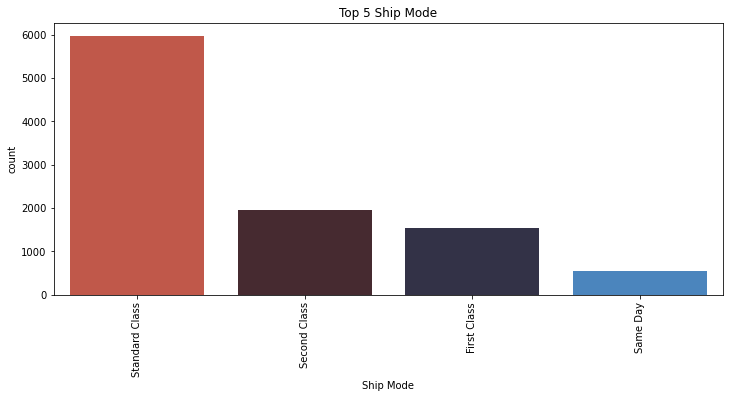

Top 5 Ship Mode are
	 1 Standard Class
	 2 Second Class
	 3 First Class
	 4 Same Day


In [7]:
countplot('Ship Mode')

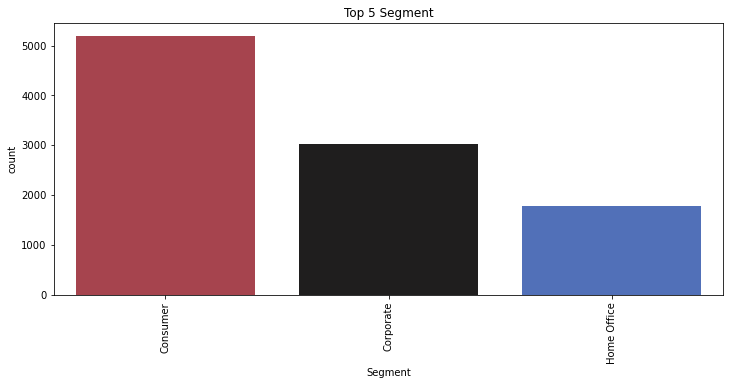

Top 5 Segment are
	 1 Consumer
	 2 Corporate
	 3 Home Office


In [8]:
countplot('Segment')

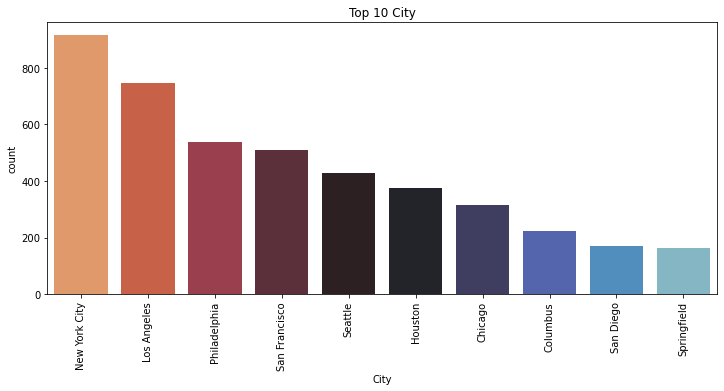

Top 10 City are
	 1 New York City
	 2 Los Angeles
	 3 Philadelphia
	 4 San Francisco
	 5 Seattle
	 6 Houston
	 7 Chicago
	 8 Columbus
	 9 San Diego
	 10 Springfield


In [9]:
countplot('City',10)

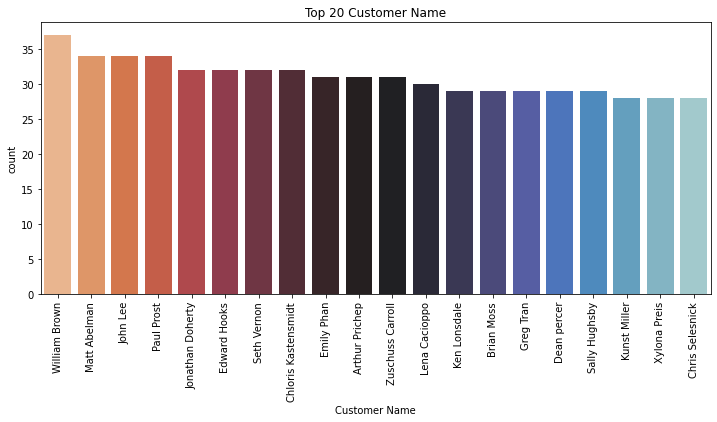

Top 20 Customer Name are
	 1 William Brown
	 2 Matt Abelman
	 3 John Lee
	 4 Paul Prost
	 5 Jonathan Doherty
	 6 Edward Hooks
	 7 Seth Vernon
	 8 Chloris Kastensmidt
	 9 Emily Phan
	 10 Arthur Prichep
	 11 Zuschuss Carroll
	 12 Lena Cacioppo
	 13 Ken Lonsdale
	 14 Brian Moss
	 15 Greg Tran
	 16 Dean percer
	 17 Sally Hughsby
	 18 Kunst Miller
	 19 Xylona Preis
	 20 Chris Selesnick


In [10]:
countplot('Customer Name',20)

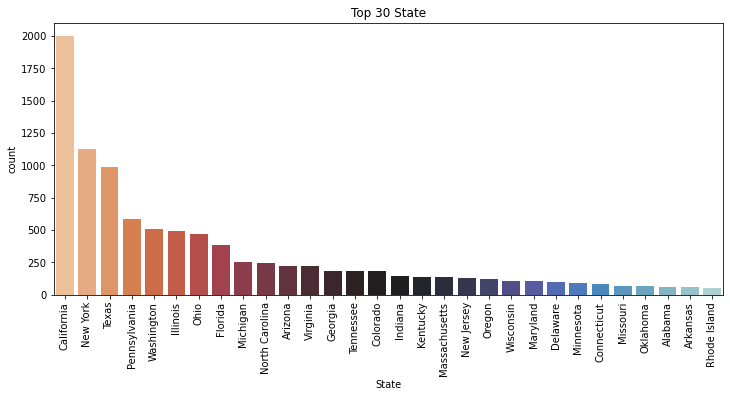

Top 30 State are
	 1 California
	 2 New York
	 3 Texas
	 4 Pennsylvania
	 5 Washington
	 6 Illinois
	 7 Ohio
	 8 Florida
	 9 Michigan
	 10 North Carolina
	 11 Arizona
	 12 Virginia
	 13 Georgia
	 14 Tennessee
	 15 Colorado
	 16 Indiana
	 17 Kentucky
	 18 Massachusetts
	 19 New Jersey
	 20 Oregon
	 21 Wisconsin
	 22 Maryland
	 23 Delaware
	 24 Minnesota
	 25 Connecticut
	 26 Missouri
	 27 Oklahoma
	 28 Alabama
	 29 Arkansas
	 30 Rhode Island


In [11]:
countplot('State',30)

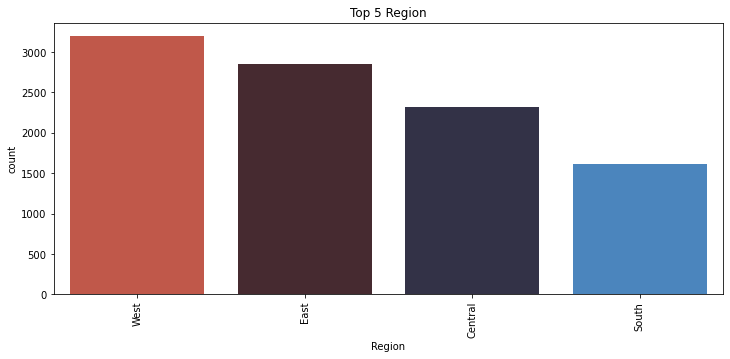

Top 5 Region are
	 1 West
	 2 East
	 3 Central
	 4 South


In [12]:
countplot('Region')

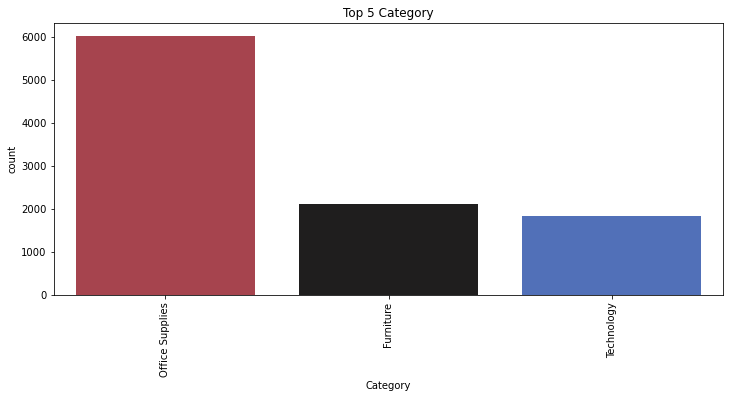

Top 5 Category are
	 1 Office Supplies
	 2 Furniture
	 3 Technology


In [13]:
countplot('Category')

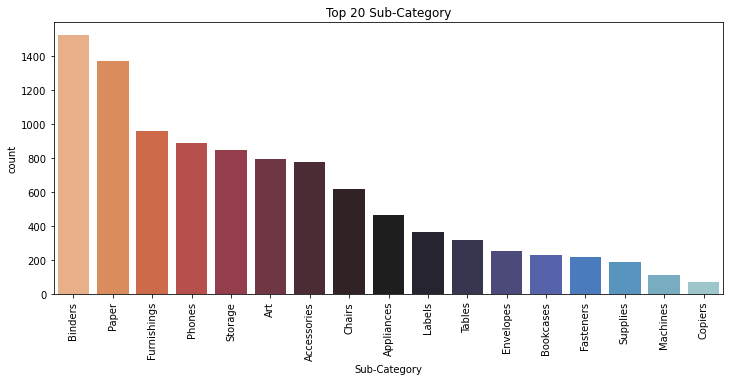

Top 20 Sub-Category are
	 1 Binders
	 2 Paper
	 3 Furnishings
	 4 Phones
	 5 Storage
	 6 Art
	 7 Accessories
	 8 Chairs
	 9 Appliances
	 10 Labels
	 11 Tables
	 12 Envelopes
	 13 Bookcases
	 14 Fasteners
	 15 Supplies
	 16 Machines
	 17 Copiers


In [14]:
countplot('Sub-Category',20)

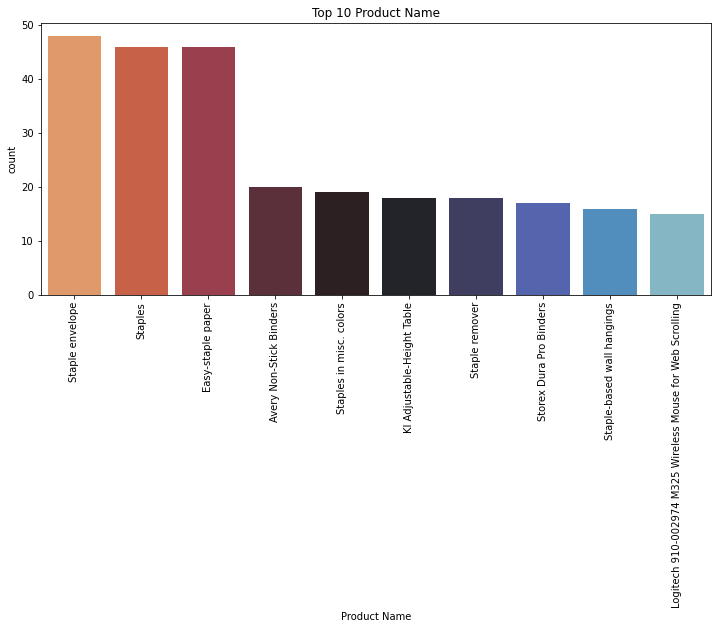

Top 10 Product Name are
	 1 Staple envelope
	 2 Staples
	 3 Easy-staple paper
	 4 Avery Non-Stick Binders
	 5 Staples in misc. colors
	 6 KI Adjustable-Height Table
	 7 Staple remover
	 8 Storex Dura Pro Binders
	 9 Staple-based wall hangings
	 10 Logitech 910-002974 M325 Wireless Mouse for Web Scrolling


In [15]:
countplot('Product Name',10)

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'].head()

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]

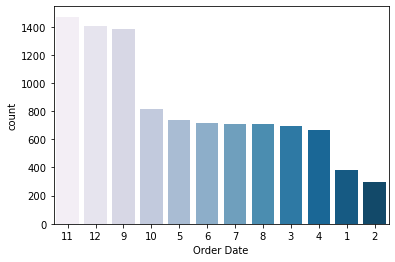

In [17]:
order = df['Order Date'].dt.month.value_counts().index
a = sns.countplot(df['Order Date'].dt.month,order = order,palette='PuBu')

    November : Thanks Giving (4th Thursday)
    December : Christmas
    September : Labour Day
    October : Halloween

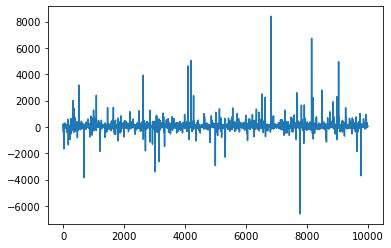

In [18]:
plt.plot(df['Profit'])

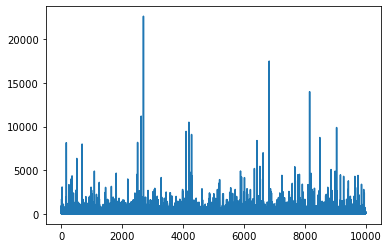

In [19]:
plt.plot(df['Sales'])

In [20]:
# Function for plotting 
def barplot(column,top=15):
    """
    column : 'Column Name' of the the feature to plot the barplot
    top : top n categories to plot
    """
    plt.figure(figsize=(12,5))
    temp = df.sort_values('Sales',ascending=False)
    order = temp[column].value_counts()[:top].index
    sns.barplot(temp[temp[column].isin(order)][column] , temp['Sales'], order = order)
    #sns.countplot(df[df[column].isin(order)][column],order = order,hue = df[df[column].isin(order)][column],palette='icefire_r')
    plt.title(f"Top {top} sales in {column} ")
    plt.xticks(rotation = 45)
    plt.show()

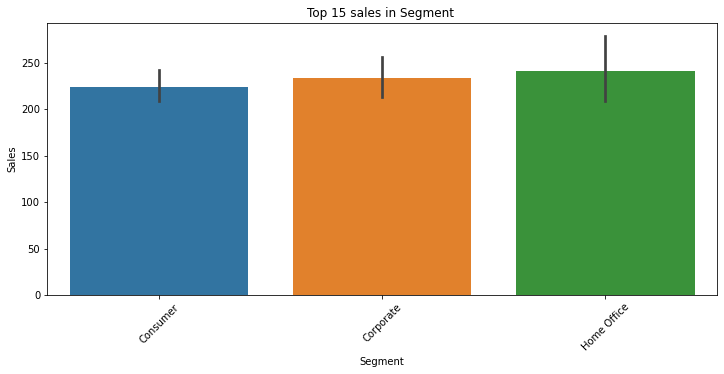

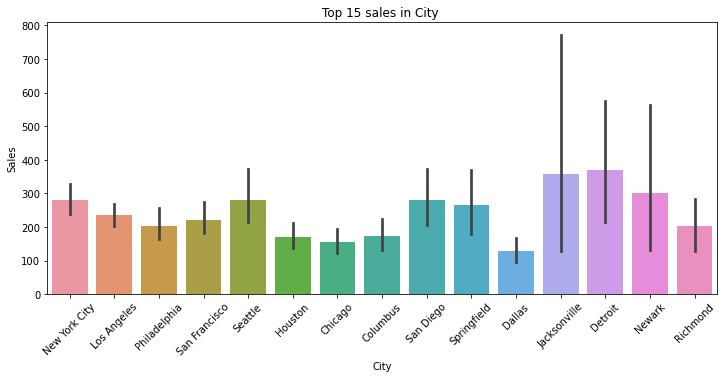

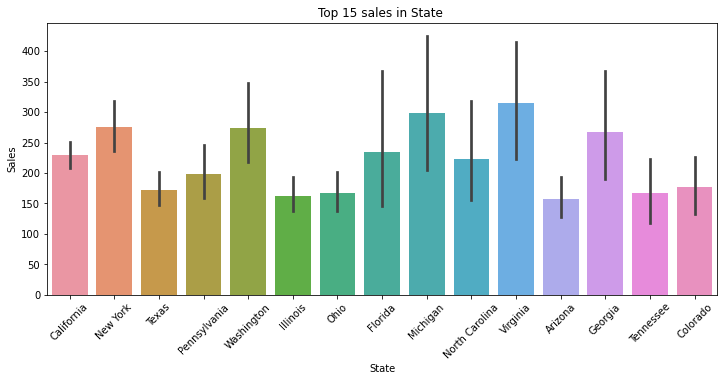

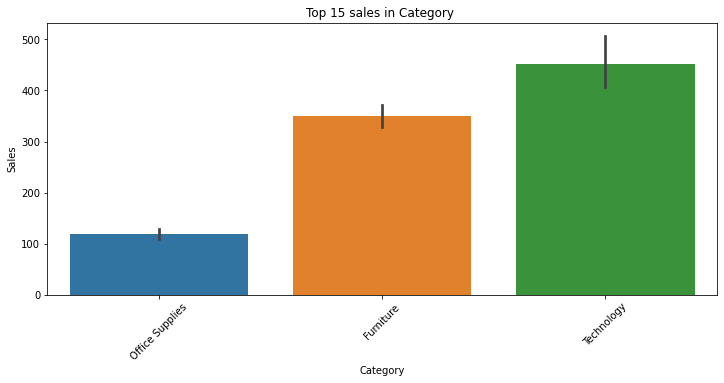

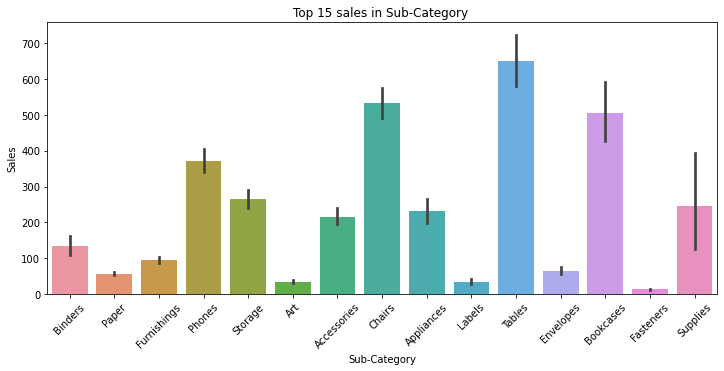

In [21]:
cols = ['Segment','City','State','Category','Sub-Category']
for i in cols:
    barplot(i)

# Feature Engineering

In [22]:
# Checking null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [24]:
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Month'] = df['Order_Month'].astype('object')

In [25]:
# Dropping non useful values
df.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','City','Postal Code','Ship Date',
         'Region','Product ID','Product Name','Order Date'],1,inplace=True)

In [26]:
# Creating Dummies
dummies = pd.get_dummies(df[['Ship Mode', 'Segment',  'Category', 'Sub-Category','Order_Month']])
dummies.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order_Month_1,Order_Month_2,Order_Month_3,Order_Month_4,Order_Month_5,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# Creating backup
new_df = df

In [28]:
# Dropping non-required column
df.drop(['Ship Mode', 'Segment', 'State', 'Category', 'Sub-Category','Order_Month'],1,inplace=True)
df = pd.concat([df,dummies],1)
df.head()

,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order_Month_1,Order_Month_2,Order_Month_3,Order_Month_4,Order_Month_5,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12
0,261.9600,2,0.00,41.9136,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,731.9400,3,0.00,219.5820,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,14.6200,2,0.00,6.8714,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,22.3680,2,0.20,2.5164,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# removing outliers
def outliers_remover(col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    ul = df[col].quantile(0.75) + 1.5*IQR
    ll = df[col].quantile(0.25) - 1.5*IQR
    return round(ul,1),round(ll,1)

In [30]:
# For Sales Column
sales_ul,sales_ll = outliers_remover('Sales')
sales_ul,sales_ll

(498.9, -271.7)

In [31]:
# For Discount Column
disc_ul,disc_ll = outliers_remover('Discount')
disc_ul,disc_ll

(0.5, -0.3)

In [32]:
# For Profit Column
profit_ul ,profit_ll = outliers_remover('Profit')
profit_ul,profit_ll

(70.8, -39.7)

In [33]:
# Filtering outliers
df  = df[(df['Sales'] > sales_ll) & (df['Sales'] <sales_ul)]
df = df[(df['Discount'] > disc_ll) & (df['Discount'] < disc_ul)]
#df = df[(df['Profit'] > profit_ll) & (df['Profit'] < profit_ul)]

In [34]:
df.shape

(7953, 43)

In [35]:
df.head()

,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order_Month_1,Order_Month_2,Order_Month_3,Order_Month_4,Order_Month_5,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12
0,261.960,2,0.0,41.9136,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,14.620,2,0.0,6.8714,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,22.368,2,0.2,2.5164,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,48.860,7,0.0,14.1694,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,7.280,4,0.0,1.9656,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(df[['Profit','Discount','Sales']])
df[['Profit','Discount','Sales']] = scaler.transform(df[['Profit','Discount','Sales']])

# Model Building

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Profit',1),df['Profit'],
                                                train_size=0.8,random_state=500,)

In [38]:
# Fitting our model using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1,max_depth=16)#15
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9623772718462242

In [39]:
rf.score(X_test,y_test)*100

82.12510228322634

In [40]:
#Making predictions
y_pred = rf.predict(X_test)

In [41]:
# Evaluating our model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("      R2 Score     : ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

      R2 Score     :  0.8212510228322634
Mean Absolute Error:  0.028551028206062222
Mean Squared Error :  0.0036745217643363256


In [42]:
top_features = pd.Series(rf.feature_importances_*100,X_train.columns)
top_features

Sales                       38.849998
Quantity                     2.864086
Discount                    31.812481
Ship Mode_First Class        0.306806
Ship Mode_Same Day           0.307200
Ship Mode_Second Class       0.381924
Ship Mode_Standard Class     0.276072
Segment_Consumer             0.290489
Segment_Corporate            0.301752
Segment_Home Office          0.315800
Category_Furniture           3.215172
Category_Office Supplies     1.009363
Category_Technology          0.583133
Sub-Category_Accessories     0.576383
Sub-Category_Appliances      0.677018
Sub-Category_Art             0.195021
Sub-Category_Binders         1.378001
Sub-Category_Bookcases       0.131098
Sub-Category_Chairs          0.266607
Sub-Category_Copiers         0.204346
Sub-Category_Envelopes       0.545393
Sub-Category_Fasteners       0.013621
Sub-Category_Furnishings     0.274766
Sub-Category_Labels          0.188306
Sub-Category_Machines        0.503187
Sub-Category_Paper           2.385369
Sub-Category

In [43]:
top_15 = top_features.nlargest(15)
top_15

Sales                       38.849998
Discount                    31.812481
Sub-Category_Storage         5.413288
Category_Furniture           3.215172
Quantity                     2.864086
Sub-Category_Paper           2.385369
Sub-Category_Binders         1.378001
Sub-Category_Supplies        1.288081
Category_Office Supplies     1.009363
Sub-Category_Phones          0.858188
Sub-Category_Tables          0.810999
Sub-Category_Appliances      0.677018
Category_Technology          0.583133
Sub-Category_Accessories     0.576383
Sub-Category_Envelopes       0.545393
dtype: float64

<AxesSubplot:>

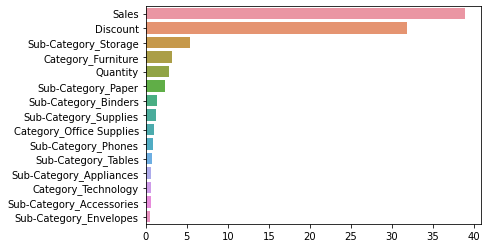

In [44]:
sns.barplot(top_15.values,top_15.index)